In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


In [2]:
#creating synthetic datapoints
from sklearn.datasets import make_regression

In [4]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [5]:
X

array([[ 0.78822982,  0.99863149],
       [-0.32367623, -0.08824301],
       [ 0.65808027,  1.45418139],
       ...,
       [ 0.83684351, -1.05491857],
       [-1.58882336, -0.57751983],
       [-0.01867223, -1.02184929]])

In [7]:
pd.DataFrame(X)[0]

0      0.788230
1     -0.323676
2      0.658080
3      1.135484
4     -0.432611
         ...   
995   -0.442771
996    0.273500
997    0.836844
998   -1.588823
999   -0.018672
Name: 0, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

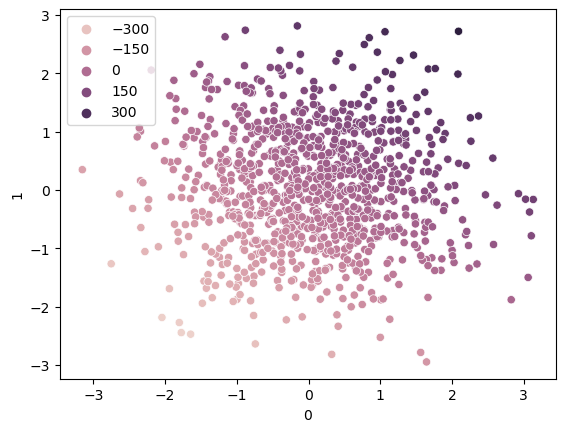

In [9]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [13]:
from sklearn.svm import SVR

In [14]:
svr=SVR(kernel="linear")

In [15]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [19]:
svr.coef_

array([[70.71073364, 91.49215251]])

In [17]:
y_pred=svr.predict(X_test)

In [20]:
from sklearn.metrics import r2_score

In [21]:
print(r2_score(y_test,y_pred))

0.9992858111958607


<span style="font-size: 20px;">Hyperparameter Tuning with SVR</span>

In [25]:
from sklearn.model_selection import GridSearchCV

#Defining parameter range
param_grid={'C':[0.1,1,10,100,1000],
            'gamma':[0.1,0.01,0.001],
            'kernel':['linear'],
            'epsilon':[0.1,0.2,0.3]
           }

In [26]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [27]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.644 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.638 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.659 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.643 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.652 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.01, kernel=linear;, score=0.644 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.01, kernel=linear;, score=0.638 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.01, kernel=linear;, score=0.659 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.01, kernel=linear;, score=0.643 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.01, kernel=linear;, score=0.652 total time=   0.0s
[CV 1/5] END C=0.1, eps

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [0.1, 0.01, 0.001], 'kernel': ['linear']},
             verbose=3)

In [28]:
grid.best_params_

{'C': 100, 'epsilon': 0.3, 'gamma': 0.1, 'kernel': 'linear'}

In [29]:
ypred4=grid.predict(X_test)

In [32]:
print(r2_score(y_pred,ypred4))

0.9999648370819824
